In [4]:
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 285s 11us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 56s 13us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


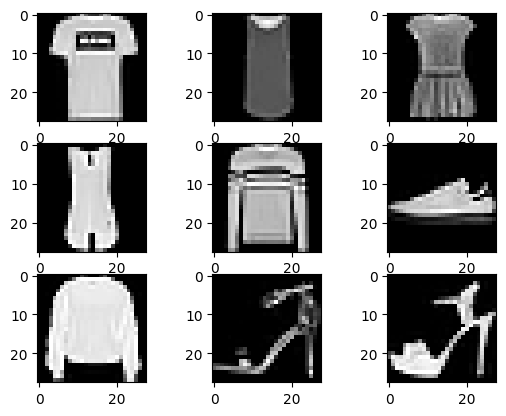

In [6]:
for i in range(1, 10):
	# Create a 3x3 grid and place the
	# image in ith position of grid
	plt.subplot(3, 3, i)
	# Insert ith image with the color map 'grap'
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()


In [7]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print(trainX.shape)


(60000, 28, 28, 1)


In [8]:
def model_arch():
	models = Sequential()
	
	# We are learning 64 
	# filters with a kernel size of 5x5
	models.add(Conv2D(64, (5, 5),
					padding="same",
					activation="relu", 
					input_shape=(28, 28, 1)))
	
	# Max pooling will reduce the
	# size with a kernel size of 2x2
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))
	
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same", 
					activation="relu"))
	
	models.add(MaxPooling2D(pool_size=(2, 2)))
	
	# Once the convolutional and pooling 
	# operations are done the layer
	# is flattened and fully connected layers
	# are added
	models.add(Flatten())
	models.add(Dense(256, activation="relu"))
	
	# Finally as there are total 10
	# classes to be added a FCC layer of
	# 10 is created with a softmax activation
	# function
	models.add(Dense(10, activation="softmax"))
	return models


In [9]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()


C:\Users\rmish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,618,698 (6.17 MB)

 Trainable params: 1,618,698 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
	trainX.astype(np.float32), trainy.astype(np.float32),
	epochs=10,
	steps_per_epoch=100,
	validation_split=0.33
)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - loss: 11.1592 - sparse_categorical_accuracy: 0.3768 - val_loss: 0.4418 - val_sparse_categorical_accuracy: 0.8384
Epoch 2/10


C:\Users\rmish\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 366ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.4418 - val_sparse_categorical_accuracy: 0.8384
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - loss: 0.3972 - sparse_categorical_accuracy: 0.8569 - val_loss: 0.3378 - val_sparse_categorical_accuracy: 0.8781
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 373ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.3378 - val_sparse_categorical_accuracy: 0.8781
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - loss: 0.2967 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.3230 - val_sparse_categorical_accuracy: 0.8842
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 320ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.3230 - val_sparse_categorical_accuracy: 0.8842
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - loss: 0.2583 - sparse_categorical_accuracy: 0.9066 - val_loss: 0.3177 - val_sparse_categori

In [12]:
model.save_weights('./model.weights.h5', overwrite=True)


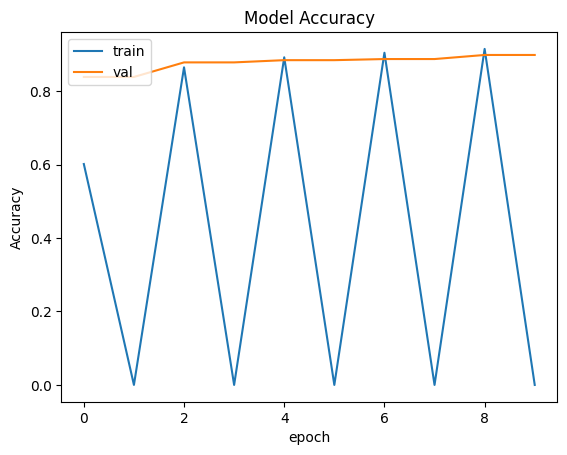

In [13]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


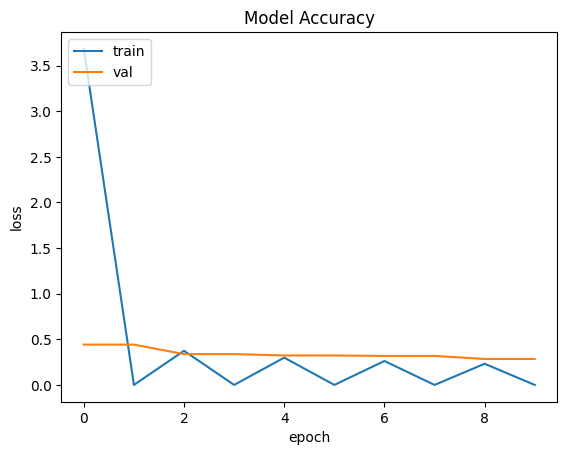

In [14]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
ankle_boots


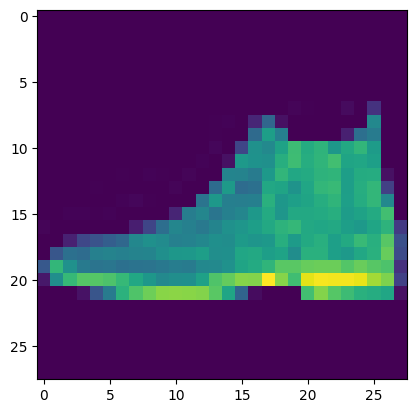

In [15]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
		'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[:1][0])
plt.show()
